In [1]:
#pip install smart_open, pandas, numpy, gensim, nltk, sklearn, matplotlib

# Data Preprocessing

In [2]:
from smart_open import smart_open
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('spam.csv')[['label', 'sms']]
df

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df['sms'].apply(lambda x: len(x.split(' '))).sum()

86961

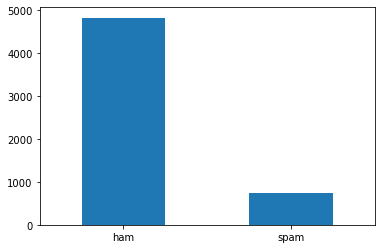

In [5]:
my_tags = df.label.unique()
df.label.value_counts().plot(kind="bar", rot=0)

In [6]:
train_data, test_data = train_test_split(df, test_size=0.33, random_state=42)

# Logistic Regression Model

In [7]:
def plot_confusion_matrix(cm, title='Predicted', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title = title
    plt.colorbar()
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=0)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [8]:
def LogisticRegressionClassifier(train_data):    
    tfidf = TfidfVectorizer(min_df=2, 
                        tokenizer=nltk.word_tokenize,
                        preprocessor=None, 
                        stop_words='english')
    
    train_data_features = tfidf.fit_transform(train_data['sms'])
    logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)
    logreg = logreg.fit(train_data_features, train_data['label'])

    return logreg, tfidf

In [9]:
def get_accuracy(model, tfidf, test_data, tags):
    target = test_data['label']
    data_features = tfidf.transform(test_data['sms'])
    predictions = model.predict(data_features)

    cm = confusion_matrix(target, predictions, labels=my_tags)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized)

    accuracy = accuracy_score(target, predictions)
    return accuracy


accuracy: 0.9771615008156607
Wall time: 1.07 s


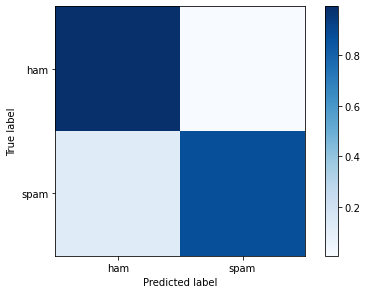

In [10]:
%%time
model, tfidf = LogisticRegressionClassifier(train_data)
print('accuracy:', get_accuracy(model, tfidf, test_data, my_tags))

In [11]:
def logreg_predict(model, tfidf, emails):
    data = pd.Series(emails)
    data_features = tfidf.transform(data)
    predictions = model.predict(data_features)
    return predictions[0]


def predict(emails):
    return logreg_predict(model, tfidf, emails)

In [14]:
%%timeit
predict('jack what u think about it')

664 µs ± 6.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
